# Introduction:
    This is plant diease detection project and We have implemented deep learning model for that. This model could achive near about 99% accuracy trained over the 38 plant disease classes.
    
    So Lets have a look at code and its accuracy.

# Importing the important libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import cv2
import glob
import os
from sklearn.model_selection import train_test_split
from PIL import Image
import re

Using TensorFlow backend.
/home/rahul/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rahul/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rahul/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rahul/anaconda3/lib/python3.7/site-packages/tensorflo

# Loading the training data

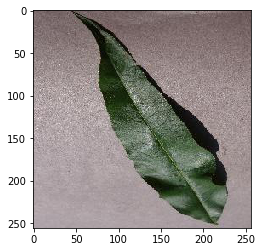

In [3]:
img=plt.imread('/home/rahul/Github/Data/plant-disease/dataset/train/Peach___healthy/f5820967-2eb3-41d7-98e4-3e05d7c4d391___Rutg._HL 3570.JPG')
plt.imshow(img)

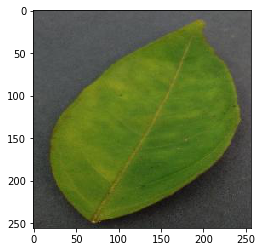

In [6]:
img=plt.imread('/home/rahul/Github/Data/plant-disease/dataset/train/Orange___Haunglongbing_(Citrus_greening)/32484aac-d300-4e78-b1d6-181b9bf96551___UF.Citrus_HLB_Lab 1751.JPG')
plt.imshow(img)

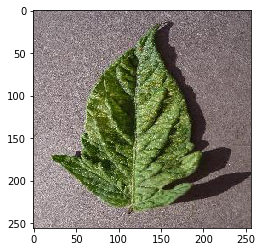

In [7]:
img=plt.imread('/home/rahul/Github/Data/plant-disease/dataset/train/Tomato___Spider_mites Two-spotted_spider_mite/90b28f76-c548-4b20-8421-fc0a6687f755___Com.G_SpM_FL 1756.JPG')
plt.imshow(img)

In [2]:
re.split('/',glob.glob('/dataset/train/*/*JPG')[0])[7]

'Strawberry___Leaf_scorch'

In [3]:
image_data=[]
label_data=[]
for i in glob.glob('/dataset/train/*/*JPG'):
    img=cv2.imread(i)
    image_to_array=Image.fromarray(img,"RGB")
    size_image=image_to_array.resize((128,128))
    image_data.append(np.array(size_image))
    label_data.append(re.split('/',i)[7])

In [4]:
image_data=np.array(image_data)

In [5]:
label_data=pd.get_dummies(label_data)

In [6]:
label_data.head()

,Apple___Apple_scab,Apple___Black_rot,Apple___Cedar_apple_rust,Apple___healthy,Blueberry___healthy,Cherry_(including_sour)___Powdery_mildew,Cherry_(including_sour)___healthy,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot,Corn_(maize)___Common_rust_,Corn_(maize)___Northern_Leaf_Blight,...,Tomato___Bacterial_spot,Tomato___Early_blight,Tomato___Late_blight,Tomato___Leaf_Mold,Tomato___Septoria_leaf_spot,Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Target_Spot,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_mosaic_virus,Tomato___healthy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Defining the neural network model

In [2]:
from keras.layers import Conv2D, Dense, Flatten, Dropout, Activation, BatchNormalization, MaxPooling2D
from keras.models import Sequential
model = Sequential()
inputShape = (128, 128, 3)
chanDim = -1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(38))
model.add(Activation("softmax"))
model.summary()








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 42, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 42, 42, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 42, 42, 64)        18496    

In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Training on train dataset

In [9]:
model.fit(image_data,label_data,epochs=20)

Epoch 1/20
42244/42244 [==============================] - 42s 997us/step - loss: 0.9500 - acc: 0.7328
Epoch 2/20
42244/42244 [==============================] - 37s 884us/step - loss: 0.4688 - acc: 0.8544
Epoch 3/20
42244/42244 [==============================] - 37s 870us/step - loss: 0.3411 - acc: 0.8934
Epoch 4/20
42244/42244 [==============================] - 36s 863us/step - loss: 0.2686 - acc: 0.9164
Epoch 5/20
42244/42244 [==============================] - 37s 870us/step - loss: 0.2735 - acc: 0.9161
Epoch 6/20
42244/42244 [==============================] - 37s 873us/step - loss: 0.1669 - acc: 0.9448
Epoch 7/20
42244/42244 [==============================] - 37s 866us/step - loss: 0.1568 - acc: 0.9496
Epoch 8/20
42244/42244 [==============================] - 37s 866us/step - loss: 0.1523 - acc: 0.9511
Epoch 9/20
42244/42244 [==============================] - 37s 872us/step - loss: 0.1243 - acc: 0.9597
Epoch 10/20
  480/42244 [..............................] - ETA: 34s - loss: 0.1057

# Loading the test dataset

In [10]:
test_image_data=[]
test_label_data=[]
for i in glob.glob('/dataset/test/*/*JPG'):
    img=cv2.imread(i)
    image_to_array=Image.fromarray(img,"RGB")
    size_image=image_to_array.resize((128,128))
    test_image_data.append(np.array(size_image))
    test_label_data.append(re.split('/',i)[7])

In [11]:
test_image_data=np.array(test_image_data)
test_label_data=pd.get_dummies(test_label_data)

# Checking with the model accuracy

In [12]:
model.evaluate(test_image_data,test_label_data)

10559/10559 [==============================] - 3s 314us/step


[0.1773367999749608, 0.9594658584641692]